In [1]:
# ANN Model for Character Recognition (TensorFlow/Keras)

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load MNIST dataset (0–9 digits)
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Normalize images (0–1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten images (28x28 → 784)
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# ANN Model
ann_model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')   # 10 classes (digits 0-9)
])

ann_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the ANN
ann_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate
test_loss, test_acc = ann_model.evaluate(x_test, y_test, verbose=2)
print(f"ANN Test Accuracy: {test_acc:.4f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8727 - loss: 0.4272 - val_accuracy: 0.9603 - val_loss: 0.1296
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9666 - loss: 0.1098 - val_accuracy: 0.9646 - val_loss: 0.1120
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9775 - loss: 0.0729 - val_accuracy: 0.9723 - val_loss: 0.0863
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9822 - loss: 0.0575 - val_accuracy: 0.9765 - val_loss: 0.0774
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9868 - loss: 0.0392 - val_accuracy: 0.9745 - val_loss: 0.0849
313/313 - 1s - 2ms/step - accuracy: 0.9745 - loss: 0.0849
ANN Test Accuracy: 0.9745


In [2]:
# CNN Model for Character Recognition (TensorFlow/Keras)

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Normalize and reshape for CNN
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# CNN Model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')   # 10 classes (digits 0-9)
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the CNN
cnn_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate
test_loss, test_acc = cnn_model.evaluate(x_test, y_test, verbose=2)
print(f"CNN Test Accuracy: {test_acc:.4f}")
11111

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.9049 - loss: 0.3155 - val_accuracy: 0.9810 - val_loss: 0.0587
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9834 - loss: 0.0526 - val_accuracy: 0.9876 - val_loss: 0.0364
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9900 - loss: 0.0315 - val_accuracy: 0.9887 - val_loss: 0.0334
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9937 - loss: 0.0207 - val_accuracy: 0.9898 - val_loss: 0.0320
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 30ms/step - accuracy: 0.9938 - loss: 0.0170 - val_accuracy: 0.9888 - val_loss: 0.0343
313/313 - 2s - 8ms/step - accuracy: 0.9888 - loss: 0.0343
CNN Test Accuracy: 0.9888


11111

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


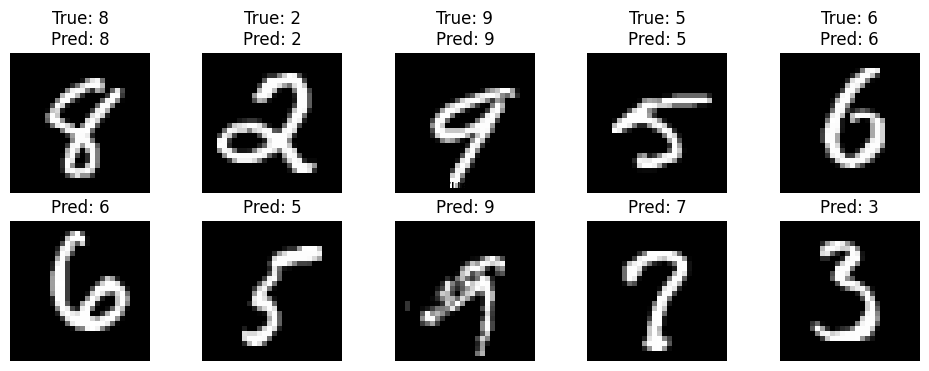

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Pick 10 random test images
indices = np.random.choice(len(x_test), 10, replace=False)
images = x_test[indices]
labels = y_test[indices]

# ANN needs flattened input (784)
images_ann = images.reshape(-1, 784)

# Get predictions
preds = ann_model.predict(images_ann)
pred_classes = np.argmax(preds, axis=1)

# Plot results
plt.figure(figsize=(12,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(images[i].reshape(28,28), cmap="gray")
    plt.title(f"True: {labels[i]}\nPred: {pred_classes[i]}")
    plt.axis("off")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


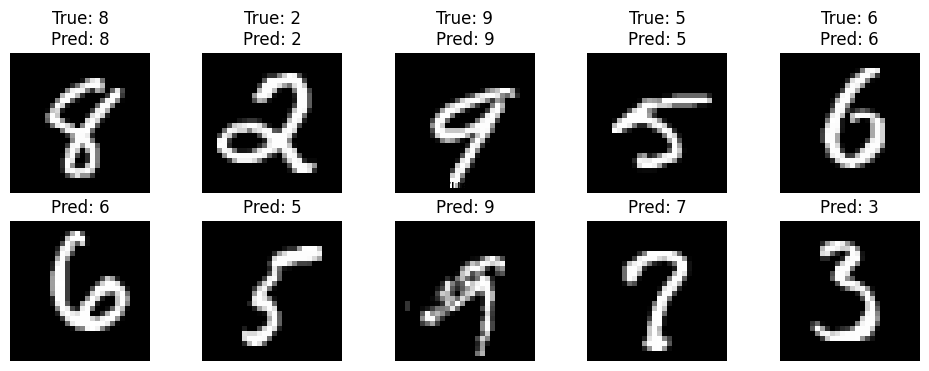

In [4]:
# CNN needs input with shape (28,28,1)
images_cnn = images.reshape(-1, 28, 28, 1)

# Get predictions
preds_cnn = cnn_model.predict(images_cnn)
pred_classes_cnn = np.argmax(preds_cnn, axis=1)

# Plot results
plt.figure(figsize=(12,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(images[i].reshape(28,28), cmap="gray")
    plt.title(f"True: {labels[i]}\nPred: {pred_classes_cnn[i]}")
    plt.axis("off")
plt.show()


In [5]:
!pip install tensorflow-datasets



In [6]:
#ANN

In [7]:
#ANN



import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load EMNIST dataset (letters + digits)
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/byclass',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

# Preprocess function
def normalize_img(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return tf.reshape(image, [-1]), label  # Flatten for ANN

# Prepare datasets
batch_size = 128
train_data = ds_train.map(normalize_img).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_data = ds_test.map(normalize_img).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# ANN Model
ann_model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(62, activation='softmax')  # 62 classes in EMNIST (0-9 + A-Z + a-z)
])

ann_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train
ann_model.fit(train_data, epochs=5, validation_data=test_data)

# Evaluate
loss, acc = ann_model.evaluate(test_data)
print(f"ANN Accuracy: {acc:.4f}")


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/byclass/incomplete.D6G93X_3.1.0/emnist-train.tfrecord*...:   0%|   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/byclass/incomplete.D6G93X_3.1.0/emnist-test.tfrecord*...:   0%|    …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/byclass/3.1.0. Subsequent calls will reuse this data.
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5453/5453 ━━━━━━━━━━━━━━━━━━━━ 168s 30ms/step - accuracy: 0.7613 - loss: 0.7933 - val_accuracy: 0.8324 - val_loss: 0.4782
Epoch 2/5
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 202s 31ms/step - accuracy: 0.8400 - loss: 0.4542 - val_accuracy: 0.8425 - val_loss: 0.4441
Epoch 3/5
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 165s 30ms/step - accuracy: 0.8505 - loss: 0.4147 - val_accuracy: 0.8465 - val_loss: 0.4330
Epoch 4/5
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 158s 29ms/step - accuracy: 0.8566 - loss: 0.3927 - val_accuracy: 0.8471 - val_loss: 0.4350
Epoch 5/5
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 160s 29ms/step - accuracy: 0.8612 - loss: 0.3754 - val_accuracy: 0.8467 - val_loss: 0.4375
909/909 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.8463 - loss: 0.4381
ANN Accuracy: 0.8467


In [8]:
#CNN


# Preprocess for CNN
def normalize_img_cnn(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return tf.expand_dims(image, -1), label  # (28,28,1)

train_data_cnn = ds_train.map(normalize_img_cnn).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_data_cnn = ds_test.map(normalize_img_cnn).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# CNN Model
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(62, activation='softmax')  # 62 classes (A-Z, a-z, 0-9)
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train
cnn_model.fit(train_data_cnn, epochs=5, validation_data=test_data_cnn)

# Evaluate
loss, acc = cnn_model.evaluate(test_data_cnn)
print(f"CNN Accuracy: {acc:.4f}")


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5453/5453 ━━━━━━━━━━━━━━━━━━━━ 628s 115ms/step - accuracy: 0.7708 - loss: 0.7602 - val_accuracy: 0.8465 - val_loss: 0.4301
Epoch 2/5
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 646s 118ms/step - accuracy: 0.8539 - loss: 0.4061 - val_accuracy: 0.8585 - val_loss: 0.3848
Epoch 3/5
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 626s 115ms/step - accuracy: 0.8630 - loss: 0.3728 - val_accuracy: 0.8625 - val_loss: 0.3721
Epoch 4/5
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 628s 115ms/step - accuracy: 0.8684 - loss: 0.3542 - val_accuracy: 0.8630 - val_loss: 0.3713
Epoch 5/5
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 624s 114ms/step - accuracy: 0.8720 - loss: 0.3409 - val_accuracy: 0.8631 - val_loss: 0.3734
909/909 ━━━━━━━━━━━━━━━━━━━━ 36s 40ms/step - accuracy: 0.8629 - loss: 0.3737
CNN Accuracy: 0.8631


In [9]:
import matplotlib.pyplot as plt
import numpy as np

# EMNIST has 62 classes: [0-9, A-Z, a-z]
# Create a mapping from class index → character
emnist_labels = [
    '0','1','2','3','4','5','6','7','8','9',
    'A','B','C','D','E','F','G','H','I','J',
    'K','L','M','N','O','P','Q','R','S','T',
    'U','V','W','X','Y','Z',
    'a','b','c','d','e','f','g','h','i','j',
    'k','l','m','n','o','p','q','r','s','t',
    'u','v','w','x','y','z'
]



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step 


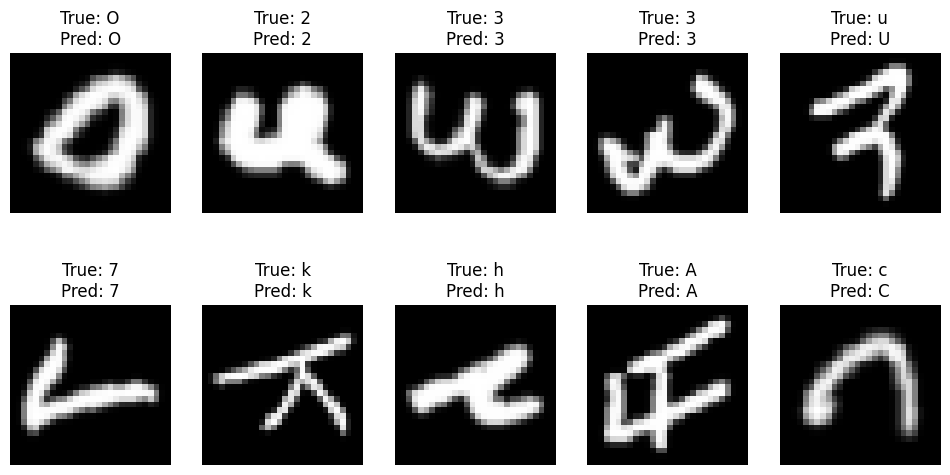

In [10]:
# Take a batch of test images ANN
for images, labels in test_data.take(1):
    preds = ann_model.predict(images)
    pred_classes = np.argmax(preds, axis=1)

    plt.figure(figsize=(12,6))
    for i in range(10):
        plt.subplot(2,5,i+1)
        img = images[i].numpy().reshape(28,28)
        plt.imshow(img, cmap="gray")
        true_label = emnist_labels[labels[i].numpy()]
        pred_label = emnist_labels[pred_classes[i]]
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis("off")
    plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


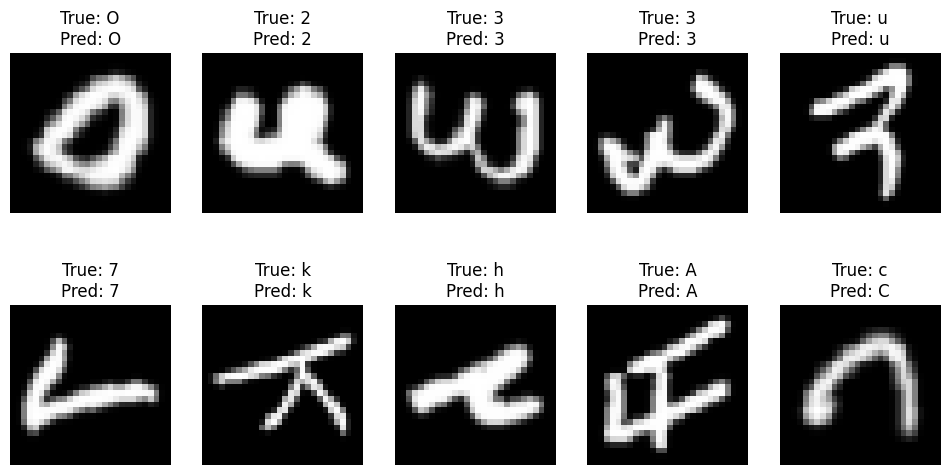

In [11]:
# Take a batch of test images CNN
for images, labels in test_data_cnn.take(1):
    preds = cnn_model.predict(images)
    pred_classes = np.argmax(preds, axis=1)

    plt.figure(figsize=(12,6))
    for i in range(10):
        plt.subplot(2,5,i+1)
        img = images[i].numpy().reshape(28,28)
        plt.imshow(img, cmap="gray")
        true_label = emnist_labels[labels[i].numpy()]
        pred_label = emnist_labels[pred_classes[i]]
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis("off")
    plt.show()
